In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
len(df)

48895

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


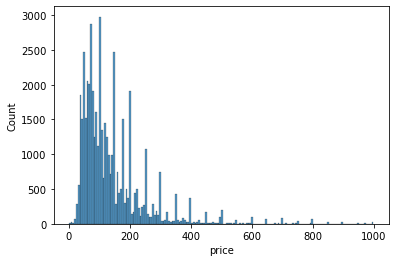

In [10]:
sns.histplot(df.price[df.price < 1000])

In [13]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

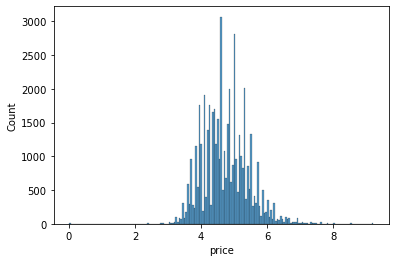

In [16]:
log_price = np.log1p(df.price)
sns.histplot(log_price)

In [17]:
n = len(df)
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - (n_test + n_val)

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()



In [18]:
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

In [19]:
del df_train['price']
del df_test['price']
del df_val['price']

In [20]:
def train_linear_regression(X, y, r=0.0):
    #add dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal equation formula
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [38]:
def rsme(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [29]:
df['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

In [106]:
def get_sorted_vals(key, val_count=10):
    u, count = np.unique(df[key], return_counts=True)
    count_sort_idx = np.argsort(-count)
    return u[count_sort_idx][:val_count]

In [114]:
base = ['latitude', 'longitude']
df_num = df_train[base]

In [70]:
df_num = df_num.fillna(0)
X_train = df_num.values

In [71]:
w_0, w = train_linear_regression(X_train, y_train)

In [72]:
y_pred = w_0 + X_train.dot(w)

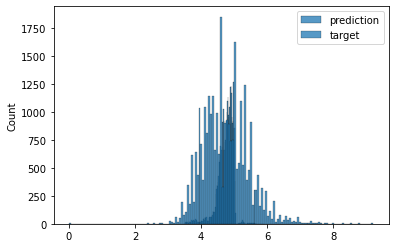

In [73]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [107]:
room_types = get_sorted_vals('room_type', 10)

In [115]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    room_types = get_sorted_vals('room_type', 10)
    neighbourhoods = get_sorted_vals('neighbourhood', 20)
    neighbourhood_groups = get_sorted_vals('neighbourhood_group', 10)
    
    for v in room_types:
        feature = 'is_room_type_%s' % v
        df[feature] = (df['room_type'] == v).astype(int)
        features.append(feature)
        
    for v in neighbourhoods:
        feature = 'is_neighbourhood_%s' % v
        df[feature] = (df['neighbourhood'] == v).astype(int)
        features.append(feature)
    
    for v in neighbourhood_groups:
        feature = 'is_neighbourhood_group_%s' % v
        df[feature] = (df['neighbourhood_group'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [116]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rsme(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test: ', rsme(y_test, y_pred))

validation:  0.48993042071019927
test:  0.490364471642998


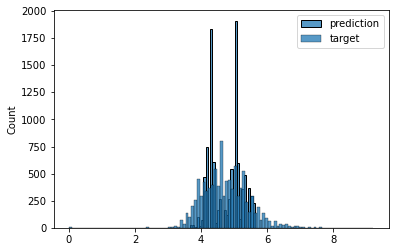

In [110]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()